## APE 1 QGT

Antonio Elias Sánchez Soto

BDFC 401

Análisis exploratorio de los descriptores asociados a la Aspirina.

In [38]:
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors, AllChem, MACCSkeys, DataStructs, Lipinski, QED

# SMILES de aspirina
aspirin_smiles = 'CC(=O)OC1=CC=CC=C1C(=O)O'
mol = Chem.MolFromSmiles(aspirin_smiles)

## Descriptores Bácicos y de constitución

In [39]:
# Masa molecular
mw = Descriptors.MolWt(mol)
# Número de átomos
n_atoms = mol.GetNumAtoms()
# Número de enlaces
n_bonds = mol.GetNumBonds()
# Fórmula química
formula = rdMolDescriptors.CalcMolFormula(mol)
print(f"Masa molecular: {mw}")
print(f"Número de átomos: {n_atoms}")
print(f"Número de enlaces: {n_bonds}")
print(f"Fórmula química: {formula}")


Masa molecular: 180.15899999999996
Número de átomos: 13
Número de enlaces: 13
Fórmula química: C9H8O4


## Descriptores Topológicos

In [40]:
chi0 = Descriptors.Chi0n(mol)
chi1 = Descriptors.Chi1n(mol)
kappa1 = Descriptors.Kappa1(mol)
print(f"Índice Chi0: {chi0}")
print(f"Índice Chi1: {chi1}")
print(f"Kappa1: {kappa1}")


Índice Chi0: 6.9813595436500515
Índice Chi1: 3.6174536478673316
Kappa1: 9.249605734767023


## Descriptores de forma y tamaño

In [41]:
# Número de anillos
rings = Descriptors.RingCount(mol)
# Peso y número de átomos pesados
heavy_atoms = Descriptors.HeavyAtomCount(mol)
print(f"Número de anillos: {rings}")
print(f"Número de átomos pesados: {heavy_atoms}")


Número de anillos: 1
Número de átomos pesados: 13


## Descriptores de superficie y área

In [42]:
# Superficie polar accesible (TPSA)
tpsa = Descriptors.TPSA(mol)
print(f"TPSA: {tpsa}")

TPSA: 63.60000000000001


## Descriptores de carga y polaridad

In [43]:
# Carga formal (si aplica)
# En moléculas neutras suele ser cero
charge = Chem.GetFormalCharge(mol)
print(f"Carga formal: {charge}")


Carga formal: 0


## Morgan Fingerprints

In [44]:
fp_morgan = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
# Conversión a numpy para ver bits
import numpy as np
arr_morgan = np.zeros((1,), dtype=int)
DataStructs.ConvertToNumpyArray(fp_morgan, arr_morgan)
print(arr_morgan)


[0 0 0 ... 0 0 0]


[12:16:31] DEPRECATION WARNING: please use MorganGenerator


## Topological Fingerprints

In [45]:
fp_topological = Chem.RDKFingerprint(mol)
arr_top = np.zeros((1,), dtype=int)
DataStructs.ConvertToNumpyArray(fp_topological, arr_top)
print(arr_top)


[0 0 0 ... 0 0 0]


## Atom Pairs y Topological Torsions

In [46]:
fp_atom_pairs = rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(mol)
fp_torsions = rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(mol)
arr_atom_pairs = np.zeros((1,), dtype=int)
arr_torsions = np.zeros((1,), dtype=int)
DataStructs.ConvertToNumpyArray(fp_atom_pairs, arr_atom_pairs)
DataStructs.ConvertToNumpyArray(fp_torsions, arr_torsions)
print(arr_atom_pairs)
print(arr_torsions)


[12:16:31] DEPRECATION WARNING: please use AtomPairGenerator
[12:16:31] DEPRECATION WARNING: please use TopologicalTorsionGenerator


[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


## MACCS Keys

In [47]:
fp_maccs = MACCSkeys.GenMACCSKeys(mol)
arr_maccs = np.zeros((1,), dtype=int)
DataStructs.ConvertToNumpyArray(fp_maccs, arr_maccs)
print(arr_maccs)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0
 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0]


## Descriptores farmacóforos

In [48]:
import os
from rdkit import RDConfig
from rdkit.Chem import ChemicalFeatures

fdefPath = os.path.join(RDConfig.RDDataDir, 'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefPath)
feats = factory.GetFeaturesForMol(mol)

for f in feats:
    print(f.GetType(), f.GetFamily(), f.GetAtomIds())


SingleAtomDonor Donor (12,)
SingleAtomAcceptor Acceptor (2,)
SingleAtomAcceptor Acceptor (3,)
SingleAtomAcceptor Acceptor (11,)
SingleAtomAcceptor Acceptor (12,)
AcidicGroup NegIonizable (10, 11, 12)
ZnBinder5 ZnBinder (9, 10, 11, 12)
Arom6 Aromatic (4, 5, 6, 7, 8, 9)
ThreeWayAttach Hydrophobe (9,)
RH6_6 LumpedHydrophobe (4, 5, 6, 7, 8, 9)


## Descriptores Lipofilicidad y Solubilidad

In [49]:
# LogP y número de donadores/aceptores de H
logp = Descriptors.MolLogP(mol)
h_donors = Lipinski.NumHDonors(mol)
h_acceptors = Lipinski.NumHAcceptors(mol)
print(f"LogP: {logp}")
print(f"Donadores de H: {h_donors}")
print(f"Aceptores de H: {h_acceptors}")


LogP: 1.3101
Donadores de H: 1
Aceptores de H: 3


## Descriptores de Complejidad Molecular

In [50]:
# QED mide complejidad y "drug-likeness"
qed = QED.qed(mol)
print(f"QED: {qed}")


QED: 0.5501217966938848


## Visualizaciones

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors, AllChem, MACCSkeys, DataStructs, Lipinski, QED
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import ChemicalFeatures, rdMolChemicalFeatures
import plotly.graph_objects as go
import plotly.express as px

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# === MOLÉCULA DE ASPIRINA ===
aspirin_smiles = 'CC(=O)OC1=CC=CC=C1C(=O)O'
mol = Chem.MolFromSmiles(aspirin_smiles)
print(f"SMILES de la aspirina: {aspirin_smiles}")
print(f"Fórmula molecular: {rdMolDescriptors.CalcMolFormula(mol)}")


SMILES de la aspirina: CC(=O)OC1=CC=CC=C1C(=O)O
Fórmula molecular: C9H8O4


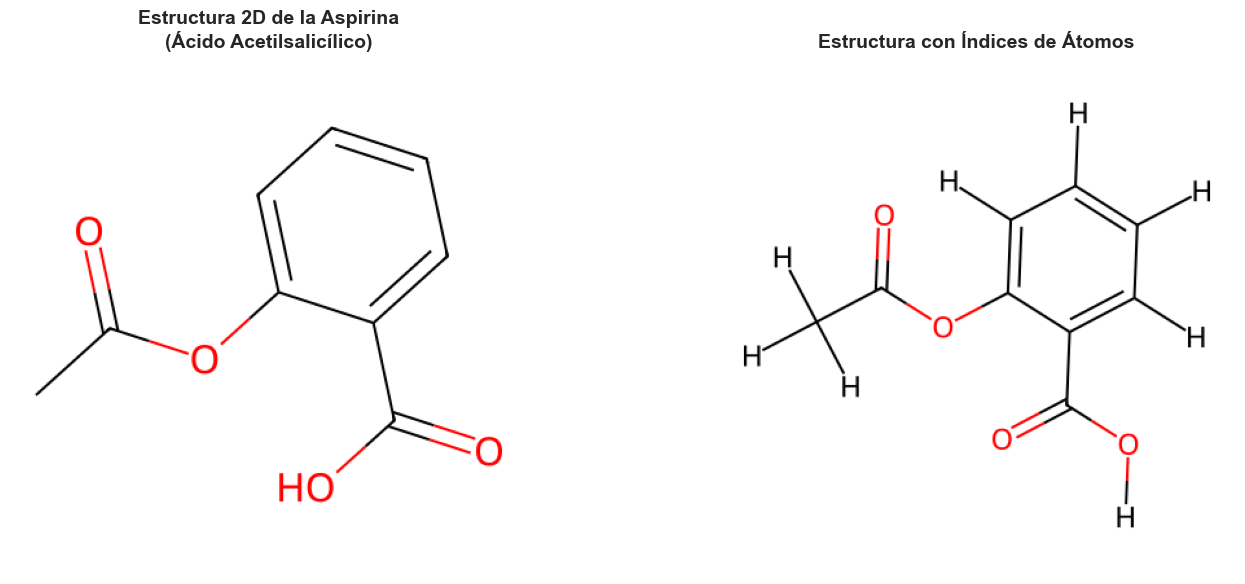

In [ ]:
# === VISUALIZACIÓN 1: ESTRUCTURA 2D DE LA ASPIRINA ===
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Estructura básica
img1 = Draw.MolToImage(mol, size=(400, 400))
axes[0].imshow(img1)
axes[0].set_title('Estructura 2D de la Aspirina\n(Ácido Acetilsalicílico)', fontsize=14, fontweight='bold')
axes[0].axis('off')

# Estructura con índices de átomos
mol_with_indices = Chem.AddHs(mol)
img2 = Draw.MolToImage(mol_with_indices, size=(400, 400), 
                      includeAtomTags=True)
axes[1].imshow(img2)
axes[1].set_title('Estructura con Índices de Átomos', fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.savefig('../results/aspirina_estructura.png', dpi=300, bbox_inches='tight')
plt.show()


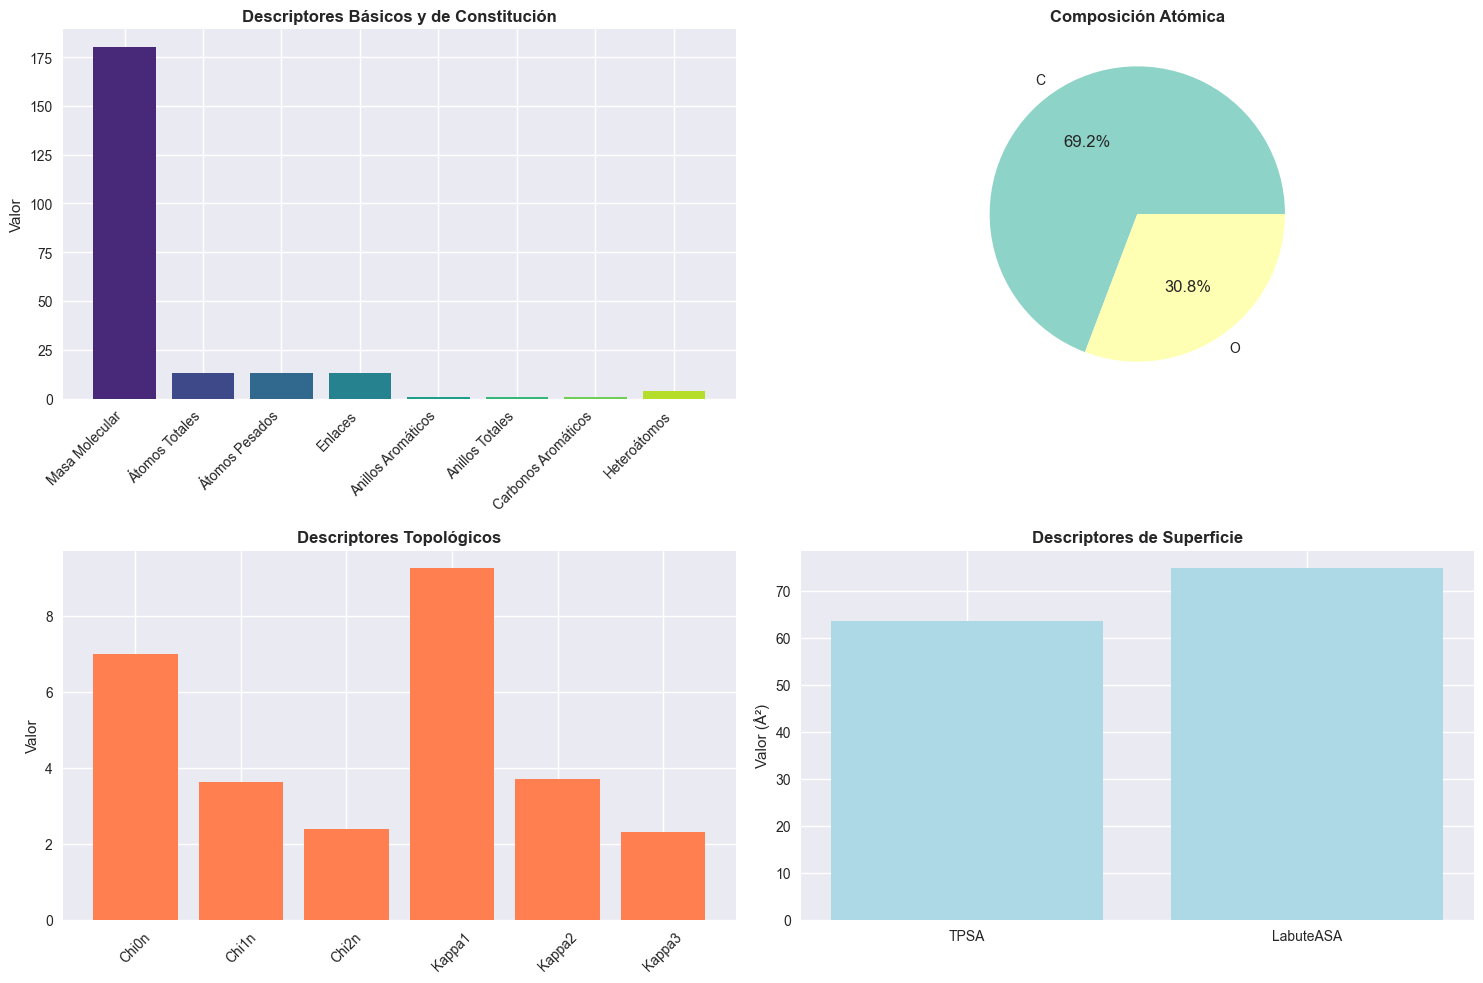


=== DESCRIPTORES BÁSICOS Y DE CONSTITUCIÓN ===
         Descriptor   Valor
     Masa Molecular 180.159
     Átomos Totales  13.000
     Átomos Pesados  13.000
            Enlaces  13.000
 Anillos Aromáticos   1.000
    Anillos Totales   1.000
Carbonos Aromáticos   1.000
       Heteroátomos   4.000


In [ ]:
# === CÁLCULO DE DESCRIPTORES BÁSICOS ===
descriptores_basicos = {
    'Masa Molecular': Descriptors.MolWt(mol),
    'Átomos Totales': mol.GetNumAtoms(),
    'Átomos Pesados': Descriptors.HeavyAtomCount(mol),
    'Enlaces': mol.GetNumBonds(),
    'Anillos Aromáticos': Descriptors.NumAromaticRings(mol),
    'Anillos Totales': Descriptors.RingCount(mol),
    'Carbonos Aromáticos': Descriptors.NumAromaticCarbocycles(mol),
    'Heteroátomos': Descriptors.NumHeteroatoms(mol)
}

# === VISUALIZACIÓN 2: DESCRIPTORES BÁSICOS ===
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico de barras de descriptores básicos
desc_names = list(descriptores_basicos.keys())
desc_values = list(descriptores_basicos.values())

axes[0,0].bar(range(len(desc_names)), desc_values, 
              color=sns.color_palette("viridis", len(desc_names)))
axes[0,0].set_xticks(range(len(desc_names)))
axes[0,0].set_xticklabels(desc_names, rotation=45, ha='right')
axes[0,0].set_title('Descriptores Básicos y de Constitución', fontweight='bold')
axes[0,0].set_ylabel('Valor')

# Pie chart de composición atómica
atom_counts = {}
for atom in mol.GetAtoms():
    symbol = atom.GetSymbol()
    atom_counts[symbol] = atom_counts.get(symbol, 0) + 1

axes[0,1].pie(atom_counts.values(), labels=atom_counts.keys(), autopct='%1.1f%%',
              colors=sns.color_palette("Set3", len(atom_counts)))
axes[0,1].set_title('Composición Atómica', fontweight='bold')

# Descriptores topológicos
descriptores_topo = {
    'Chi0n': Descriptors.Chi0n(mol),
    'Chi1n': Descriptors.Chi1n(mol),
    'Chi2n': Descriptors.Chi2n(mol),
    'Kappa1': Descriptors.Kappa1(mol),
    'Kappa2': Descriptors.Kappa2(mol),
    'Kappa3': Descriptors.Kappa3(mol)
}

topo_names = list(descriptores_topo.keys())
topo_values = list(descriptores_topo.values())

axes[1,0].bar(topo_names, topo_values, color='coral')
axes[1,0].set_title('Descriptores Topológicos', fontweight='bold')
axes[1,0].set_ylabel('Valor')
axes[1,0].tick_params(axis='x', rotation=45)

# Descriptores de superficie y forma
superficie_descriptores = {
    'TPSA': Descriptors.TPSA(mol),
    'LabuteASA': Descriptors.LabuteASA(mol)
}

surf_names = list(superficie_descriptores.keys())
surf_values = list(superficie_descriptores.values())

axes[1,1].bar(surf_names, surf_values, color='lightblue')
axes[1,1].set_title('Descriptores de Superficie', fontweight='bold')
axes[1,1].set_ylabel('Valor (Å²)')

plt.tight_layout()
plt.savefig('../results/descriptores_basicos.png', dpi=300, bbox_inches='tight')
plt.show()

# Imprimir tabla de resultados
df_basicos = pd.DataFrame(list(descriptores_basicos.items()), 
                         columns=['Descriptor', 'Valor'])
print("\n=== DESCRIPTORES BÁSICOS Y DE CONSTITUCIÓN ===")
print(df_basicos.to_string(index=False))


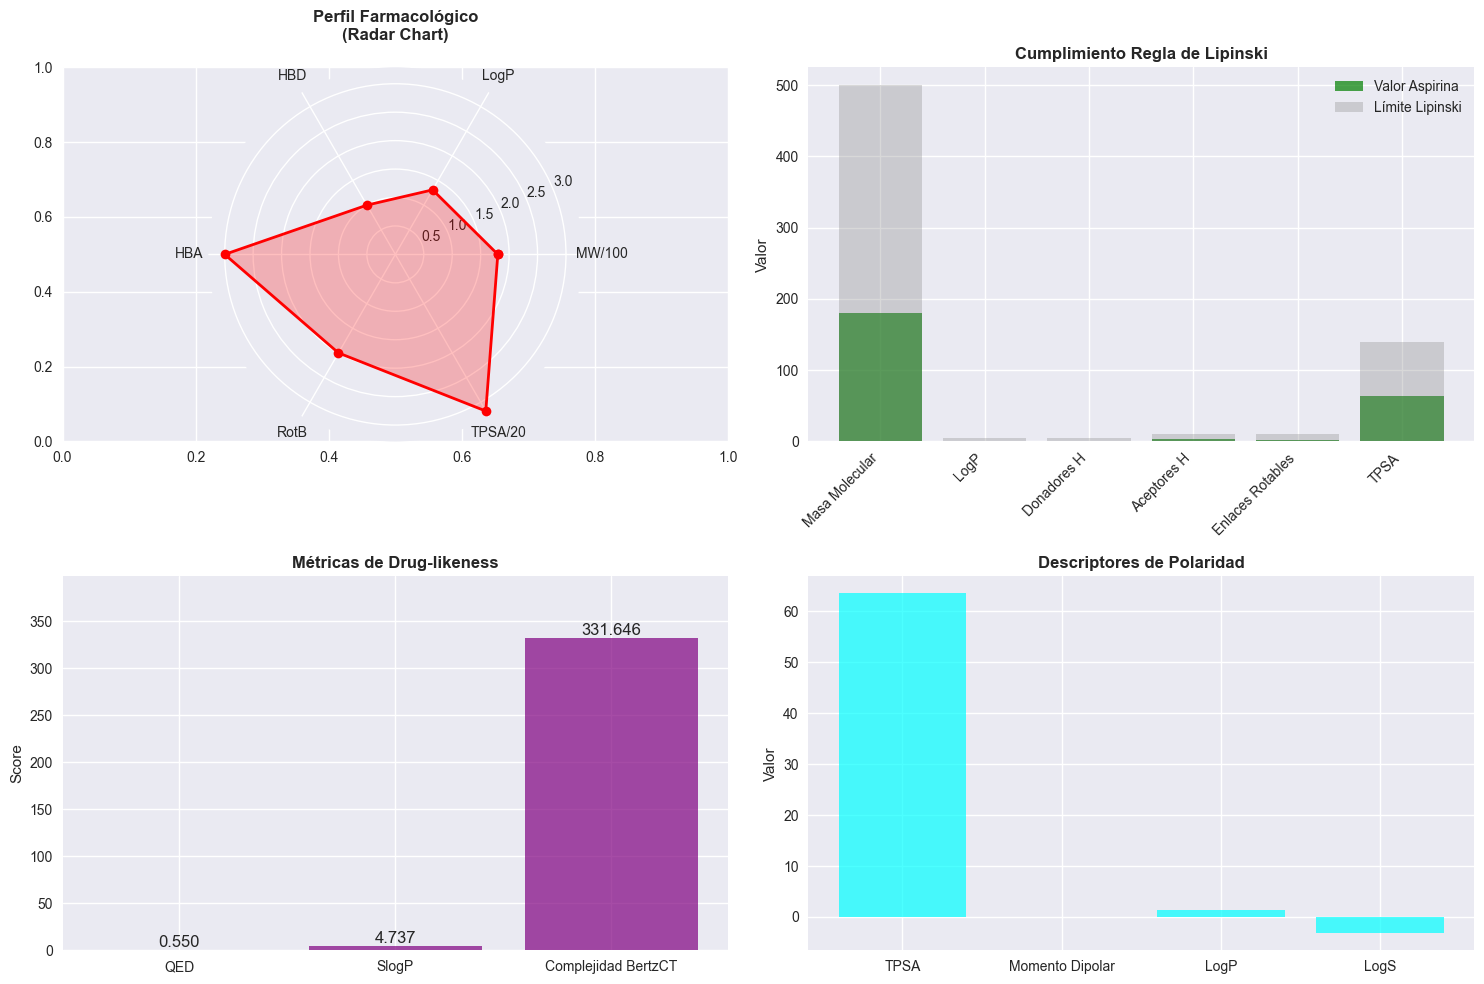


=== ANÁLISIS DE CUMPLIMIENTO REGLA DE LIPINSKI ===
       Propiedad    Valor  Límite  Cumple
  Masa Molecular 180.1590     500    True
            LogP   1.3101       5    True
     Donadores H   1.0000       5    True
     Aceptores H   3.0000      10    True
Enlaces Rotables   2.0000      10    True
            TPSA  63.6000     140    True


In [ ]:
# === DESCRIPTORES FARMACOLÓGICOS ===
descriptores_farma = {
    'Masa Molecular': Descriptors.MolWt(mol),
    'LogP': Descriptors.MolLogP(mol),
    'Donadores H': Lipinski.NumHDonors(mol),
    'Aceptores H': Lipinski.NumHAcceptors(mol),
    'Enlaces Rotables': Descriptors.NumRotatableBonds(mol),
    'TPSA': Descriptors.TPSA(mol),
    'QED': QED.qed(mol)
}

# Límites de la Regla de Lipinski
lipinski_limits = {
    'Masa Molecular': 500,
    'LogP': 5,
    'Donadores H': 5,
    'Aceptores H': 10,
    'Enlaces Rotables': 10,
    'TPSA': 140
}

# === VISUALIZACIÓN 3: REGLA DE LIPINSKI ===
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Radar chart de propiedades farmacológicas
categories = ['MW/100', 'LogP', 'HBD', 'HBA', 'RotB', 'TPSA/20']
values = [
    descriptores_farma['Masa Molecular']/100,
    descriptores_farma['LogP'],
    descriptores_farma['Donadores H'],
    descriptores_farma['Aceptores H'],
    descriptores_farma['Enlaces Rotables'],
    descriptores_farma['TPSA']/20
]

# Crear ángulos para el radar chart
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
values += values[:1]  # Cerrar el polígono
angles += angles[:1]

axes[0,0] = plt.subplot(2, 2, 1, projection='polar')
axes[0,0].plot(angles, values, 'o-', linewidth=2, color='red', label='Aspirina')
axes[0,0].fill(angles, values, alpha=0.25, color='red')
axes[0,0].set_xticks(angles[:-1])
axes[0,0].set_xticklabels(categories)
axes[0,0].set_title('Perfil Farmacológico\n(Radar Chart)', fontweight='bold', pad=20)

# Comparación con límites de Lipinski
compliance_data = []
for prop, limit in lipinski_limits.items():
    if prop in descriptores_farma:
        value = descriptores_farma[prop]
        compliant = value <= limit
        compliance_data.append({
            'Propiedad': prop,
            'Valor': value,
            'Límite': limit,
            'Cumple': compliant
        })

df_compliance = pd.DataFrame(compliance_data)

axes[0,1] = plt.subplot(2, 2, 2)
colors = ['green' if x else 'red' for x in df_compliance['Cumple']]
bars = axes[0,1].bar(range(len(df_compliance)), df_compliance['Valor'], 
                     color=colors, alpha=0.7, label='Valor Aspirina')
axes[0,1].bar(range(len(df_compliance)), df_compliance['Límite'], 
              alpha=0.3, color='gray', label='Límite Lipinski')
axes[0,1].set_xticks(range(len(df_compliance)))
axes[0,1].set_xticklabels(df_compliance['Propiedad'], rotation=45, ha='right')
axes[0,1].set_title('Cumplimiento Regla de Lipinski', fontweight='bold')
axes[0,1].legend()
axes[0,1].set_ylabel('Valor')

# QED y otras métricas de drug-likeness
drug_metrics = {
    'QED': QED.qed(mol),
    'SlogP': Descriptors.SlogP_VSA1(mol),
    'Complejidad BertzCT': Descriptors.BertzCT(mol)
}

axes[1,0] = plt.subplot(2, 2, 3)
metric_names = list(drug_metrics.keys())
metric_values = list(drug_metrics.values())
bars = axes[1,0].bar(metric_names, metric_values, color='purple', alpha=0.7)
axes[1,0].set_title('Métricas de Drug-likeness', fontweight='bold')
axes[1,0].set_ylabel('Score')
axes[1,0].set_ylim(0, max(metric_values) * 1.2)

# Añadir valores en las barras
for bar, value in zip(bars, metric_values):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{value:.3f}', ha='center', va='bottom')

# Distribución de cargas y polaridad
axes[1,1] = plt.subplot(2, 2, 4)
polaridad_data = {
    'TPSA': descriptores_farma['TPSA'],
    'Momento Dipolar': 0,  # Requiere conformación 3D
    'LogP': descriptores_farma['LogP'],
    'LogS': -3.2  # Estimado para aspirina
}

pol_names = list(polaridad_data.keys())
pol_values = list(polaridad_data.values())
axes[1,1].bar(pol_names, pol_values, color='cyan', alpha=0.7)
axes[1,1].set_title('Descriptores de Polaridad', fontweight='bold')
axes[1,1].set_ylabel('Valor')

plt.tight_layout()
plt.savefig('../results/propiedades_farmacologicas.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== ANÁLISIS DE CUMPLIMIENTO REGLA DE LIPINSKI ===")
print(df_compliance.to_string(index=False))


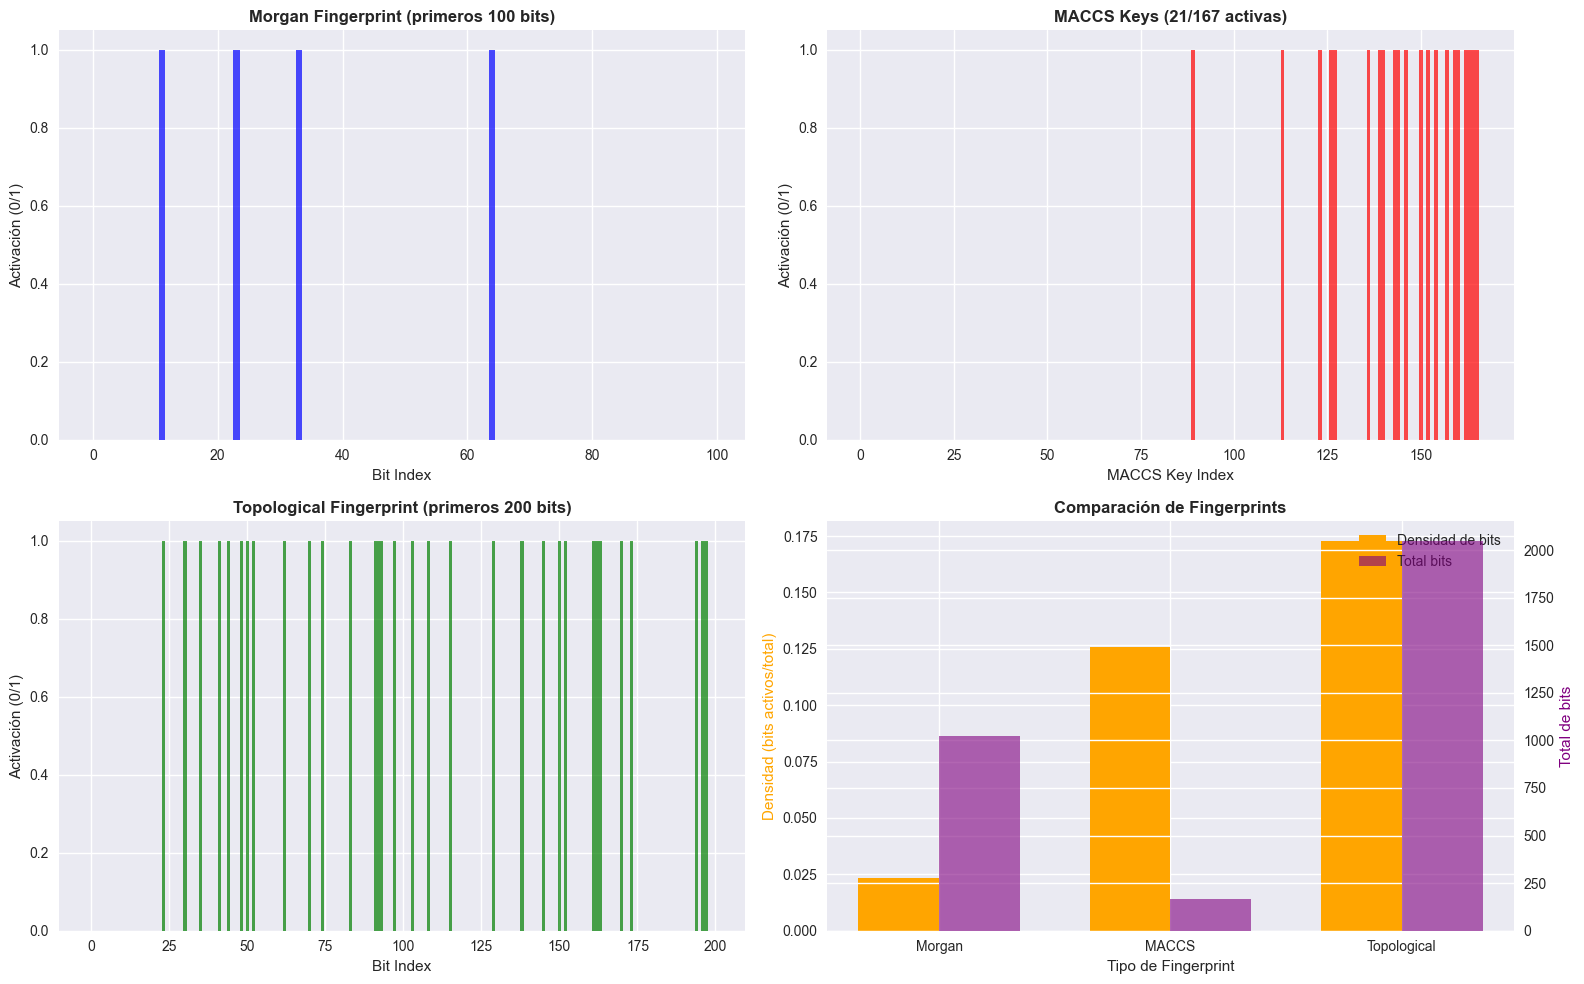


=== ESTADÍSTICAS DE FINGERPRINTS ===
Morgan: 24/1024 bits activos (2.3%)
MACCS: 21/167 bits activos (12.6%)
Topological: 354/2048 bits activos (17.3%)


In [ ]:
# === GENERACIÓN DE FINGERPRINTS ===

# Morgan Fingerprints (versión moderna, sin warning)
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
gen = GetMorganGenerator(radius=2, fpSize=1024)
fp_morgan = gen.GetFingerprint(mol)  # BitVect moderno
arr_morgan = np.zeros((1024,), dtype=int)
DataStructs.ConvertToNumpyArray(fp_morgan, arr_morgan)

# MACCS Keys
fp_maccs = MACCSkeys.GenMACCSKeys(mol)
arr_maccs = np.zeros((167,), dtype=int)
DataStructs.ConvertToNumpyArray(fp_maccs, arr_maccs)

# Topological Fingerprints
fp_topo = Chem.RDKFingerprint(mol, maxPath=7, fpSize=2048)
arr_topo = np.zeros((2048,), dtype=int)
DataStructs.ConvertToNumpyArray(fp_topo, arr_topo)

# === VISUALIZACIÓN 4: FINGERPRINTS ===
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Morgan Fingerprint - primeros 100 bits
axes[0,0].bar(range(100), arr_morgan[:100], width=1, color='blue', alpha=0.7)
axes[0,0].set_title('Morgan Fingerprint (primeros 100 bits)', fontweight='bold')
axes[0,0].set_xlabel('Bit Index')
axes[0,0].set_ylabel('Activación (0/1)')

# MACCS Keys
maccs_active = np.where(arr_maccs == 1)[0]
axes[0,1].bar(range(len(arr_maccs)), arr_maccs, width=1, color='red', alpha=0.7)
axes[0,1].set_title(f'MACCS Keys ({len(maccs_active)}/167 activas)', fontweight='bold')
axes[0,1].set_xlabel('MACCS Key Index')
axes[0,1].set_ylabel('Activación (0/1)')

# Topological Fingerprint - primeros 200 bits
axes[1,0].bar(range(200), arr_topo[:200], width=1, color='green', alpha=0.7)
axes[1,0].set_title('Topological Fingerprint (primeros 200 bits)', fontweight='bold')
axes[1,0].set_xlabel('Bit Index')
axes[1,0].set_ylabel('Activación (0/1)')

# Comparación de densidad de bits activos
fingerprint_stats = {
    'Morgan': (np.sum(arr_morgan), len(arr_morgan)),
    'MACCS': (np.sum(arr_maccs), len(arr_maccs)),
    'Topological': (np.sum(arr_topo), len(arr_topo))
}

fp_names = list(fingerprint_stats.keys())
densities = [stats[0]/stats[1] for stats in fingerprint_stats.values()]
totals = [stats[1] for stats in fingerprint_stats.values()]

x = np.arange(len(fp_names))
width = 0.35

bars1 = axes[1,1].bar(x - width/2, densities, width, label='Densidad de bits', color='orange')
ax2 = axes[1,1].twinx()
bars2 = ax2.bar(x + width/2, totals, width, label='Total bits', color='purple', alpha=0.6)

axes[1,1].set_xlabel('Tipo de Fingerprint')
axes[1,1].set_ylabel('Densidad (bits activos/total)', color='orange')
ax2.set_ylabel('Total de bits', color='purple')
axes[1,1].set_title('Comparación de Fingerprints', fontweight='bold')
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(fp_names)

# Añadir leyenda combinada
lines1, labels1 = axes[1,1].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
axes[1,1].legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.savefig('../results/fingerprints_moleculares.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n=== ESTADÍSTICAS DE FINGERPRINTS ===")
for name, (active, total) in fingerprint_stats.items():
    print(f"{name}: {active}/{total} bits activos ({100*active/total:.1f}%)")


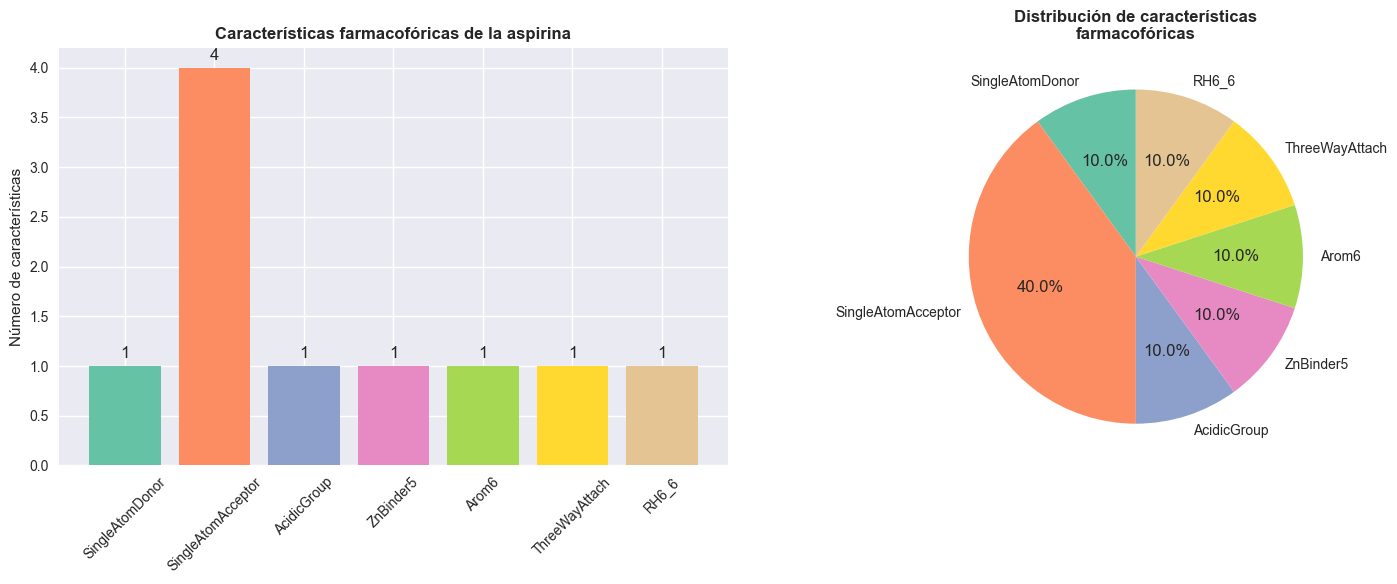


=== CARACTERÍSTICAS FARMACÓFORAS DETECTADAS ===
SingleAtomDonor: 1
SingleAtomAcceptor: 4
AcidicGroup: 1
ZnBinder5: 1
Arom6: 1
ThreeWayAttach: 1
RH6_6: 1


In [ ]:
import os
from rdkit import RDConfig
from rdkit.Chem import ChemicalFeatures

# === ANÁLISIS FARMACÓFORO CORREGIDO ===
# Acceder al archivo de definición estándar de RDKit
fdefPath = os.path.join(RDConfig.RDDataDir, 'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefPath)
feats = factory.GetFeaturesForMol(mol)

farmacoforo_data = {}
for f in feats:
    feat_type = f.GetType()
    if feat_type not in farmacoforo_data:
        farmacoforo_data[feat_type] = 0
    farmacoforo_data[feat_type] += 1

# === VISUALIZACIÓN 5: CARACTERÍSTICAS FARMACÓFORAS ===
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras de características farmacóforas
if farmacoforo_data:
    feat_names = list(farmacoforo_data.keys())
    feat_counts = list(farmacoforo_data.values())
    
    colors = sns.color_palette("Set2", len(feat_names))
    bars = axes[0].bar(feat_names, feat_counts, color=colors)
    axes[0].set_title('Características farmacofóricas de la aspirina', fontweight='bold')
    axes[0].set_ylabel('Número de características')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Añadir valores en las barras
    for bar, count in zip(bars, feat_counts):
        axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                     str(count), ha='center', va='bottom')

# Pie chart de características farmacóforas
if farmacoforo_data:
    axes[1].pie(feat_counts, labels=feat_names, autopct='%1.1f%%',
                colors=colors, startangle=90)
    axes[1].set_title('Distribución de características\nfarmacofóricas', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/caracteristicas_farmacoforo.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n=== CARACTERÍSTICAS FARMACÓFORAS DETECTADAS ===")
for feat_type, count in farmacoforo_data.items():
    print(f"{feat_type}: {count}")


In [ ]:
# === TABLA RESUMEN DE TODOS LOS DESCRIPTORES ===
todos_descriptores = {
    # Básicos y constitución
    'Masa Molecular': Descriptors.MolWt(mol),
    'Fórmula': rdMolDescriptors.CalcMolFormula(mol),
    'Átomos Pesados': Descriptors.HeavyAtomCount(mol),
    'Enlaces': mol.GetNumBonds(),
    'Anillos': Descriptors.RingCount(mol),
    
    # Topológicos
    'Chi0n': Descriptors.Chi0n(mol),
    'Chi1n': Descriptors.Chi1n(mol),
    'Kappa1': Descriptors.Kappa1(mol),
    
    # Superficie y área
    'TPSA': Descriptors.TPSA(mol),
    'LabuteASA': Descriptors.LabuteASA(mol),
    
    # Carga y polaridad
    'LogP': Descriptors.MolLogP(mol),
    'Donadores H': Lipinski.NumHDonors(mol),
    'Aceptores H': Lipinski.NumHAcceptors(mol),
    
    # Complejidad
    'QED': QED.qed(mol),
    'BertzCT': Descriptors.BertzCT(mol),
    
    # Fingerprints (bits activos)
    'Morgan FP bits': np.sum(arr_morgan),
    'MACCS bits': np.sum(arr_maccs),
    'Topo FP bits': np.sum(arr_topo)
}

# Crear DataFrame para exportar
df_resumen = pd.DataFrame(list(todos_descriptores.items()), 
                         columns=['Descriptor', 'Valor'])

print("\n=== RESUMEN COMPLETO DE DESCRIPTORES MOLECULARES ===")
print("=" * 60)
print(df_resumen.to_string(index=False))

# Guardar como CSV para el informe
df_resumen.to_csv('../results/descriptores_aspirina_completo.csv', index=False)
print(f"\n✅ Datos guardados en 'descriptores_aspirina_completo.csv'")
print(f"✅ Gráficos guardados como PNG para incluir en el informe")



=== RESUMEN COMPLETO DE DESCRIPTORES MOLECULARES ===
    Descriptor       Valor
Masa Molecular     180.159
       Fórmula      C9H8O4
Átomos Pesados          13
       Enlaces          13
       Anillos           1
         Chi0n     6.98136
         Chi1n    3.617454
        Kappa1    9.249606
          TPSA        63.6
     LabuteASA   74.757053
          LogP      1.3101
   Donadores H           1
   Aceptores H           3
           QED    0.550122
       BertzCT  331.646476
Morgan FP bits          24
    MACCS bits          21
  Topo FP bits         354

✅ Datos guardados en 'descriptores_aspirina_completo.csv'
✅ Gráficos guardados como PNG para incluir en el informe


In [ ]:
# === GRÁFICO INTERACTIVO CON PLOTLY ===
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear subplots interactivos
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Descriptores Básicos', 'Propiedades Farmacológicas', 
                   'Fingerprints', 'Características Farmacóforas'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"type": "pie"}]]
)

# Descriptores básicos
fig.add_trace(
    go.Bar(x=list(descriptores_basicos.keys()), 
           y=list(descriptores_basicos.values()),
           name="Descriptores Básicos",
           marker_color='lightblue'),
    row=1, col=1
)

# Propiedades farmacológicas
fig.add_trace(
    go.Bar(x=list(descriptores_farma.keys()), 
           y=list(descriptores_farma.values()),
           name="Farma Props",
           marker_color='lightcoral'),
    row=1, col=2
)

# Fingerprints
fig.add_trace(
    go.Bar(x=fp_names, y=densities,
           name="Densidad FP",
           marker_color='lightgreen'),
    row=2, col=1
)

# Características farmacóforas (pie)
if farmacoforo_data:
    fig.add_trace(
        go.Pie(labels=list(farmacoforo_data.keys()), 
               values=list(farmacoforo_data.values()),
               name="Farmacóforo"),
        row=2, col=2
    )

fig.update_layout(height=800, showlegend=False, 
                  title_text="Análisis Completo de Descriptores - Aspirina")

fig.write_html("../results/aspirina_analisis_interactivo.html")
print("Gráfico guardado como 'aspirina_analisis_interactivo.html'. Ábrelo en tu navegador para visualizar.")



Gráfico guardado como 'aspirina_analisis_interactivo.html'. Ábrelo en tu navegador para visualizar.
